<a href="https://colab.research.google.com/github/Tushar1000x/Image_processing/blob/main/ImageProcessing_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.

Saving tiger.png to tiger.png


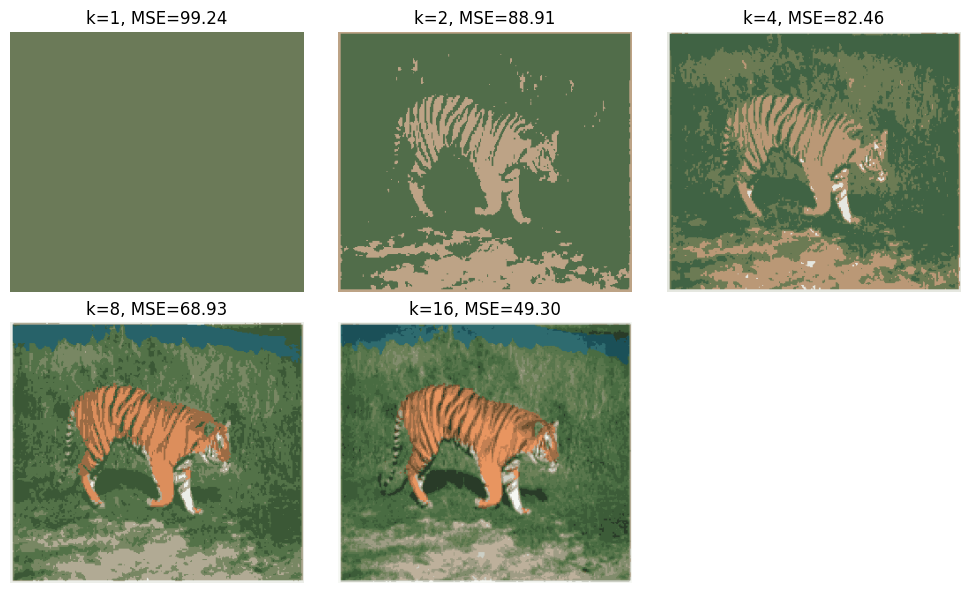

MSE values:
k=1: MSE=99.24
k=2: MSE=88.91
k=4: MSE=82.46
k=8: MSE=68.93
k=16: MSE=49.30


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
from PIL import Image
import io

def kmeans_quantization(image, k):
    # Reshape the image into a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)

    # Replace each pixel with its nearest cluster center
    quantized_pixels = kmeans.cluster_centers_[kmeans.labels_]
    quantized_image = quantized_pixels.reshape(image.shape).astype(np.uint8)

    return quantized_image

def calculate_mse(original, quantized):
    return np.mean((original - quantized) ** 2)

def main():
    # Upload image in Google Colab
    uploaded = files.upload()
    image_name = list(uploaded.keys())[0]

    image = Image.open(io.BytesIO(uploaded[image_name]))
    image = image.convert('RGB')
    image = np.array(image)

    k_values = [1, 2, 4, 8, 16]
    mse_values = []

    plt.figure(figsize=(10, 6))

    for i, k in enumerate(k_values):
        quantized_image = kmeans_quantization(image, k)
        mse = calculate_mse(image, quantized_image)
        mse_values.append(mse)

        plt.subplot(2, 3, i + 1)
        plt.imshow(quantized_image)
        plt.title(f'k={k}, MSE={mse:.2f}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("MSE values:")
    for k, mse in zip(k_values, mse_values):
        print(f'k={k}: MSE={mse:.2f}')

if __name__ == "__main__":
    main()


2.

Saving tiger.png to tiger (1).png


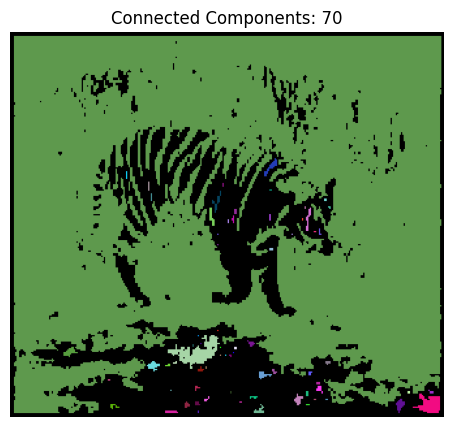

Total Connected Components Found: 70


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image

def connected_components(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply thresholding
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    # Find connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Create an output image to visualize the components
    output = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    # Assign random colors to each component
    for i in range(1, num_labels):  # Skipping the background label (0)
        mask = labels == i
        output[mask] = np.random.randint(0, 255, 3, dtype=np.uint8)

    return output, num_labels - 1  # Subtract 1 to exclude the background component

def main():
    # Upload image in Google Colab
    uploaded = files.upload()
    image_name = list(uploaded.keys())[0]

    # Process the image
    output_image, component_count = connected_components(image_name)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.imshow(output_image)
    plt.title(f'Connected Components: {component_count}')
    plt.axis('off')
    plt.show()

    print(f'Total Connected Components Found: {component_count}')

if __name__ == "__main__":
    main()


3.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
from PIL import Image

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value, mse

def downsample_image(image_path, output_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)
    cv2.imwrite(output_path, resized_image)
    return resized_image

def upscale_image(image, method):
    return cv2.resize(image, (512, 512), interpolation=method)

def main():
    # Upload images in Google Colab
    uploaded = files.upload()
    lena_original = 'lena_gray_512.tif'
    lena_reference = 'lena_gray_256.tif'

    if lena_original not in uploaded or lena_reference not in uploaded:
        print("Please upload 'lena_gray_512.tif' and 'lena_gray_256.tif'")
        return

    # Reduce image size
    reduced_image = downsample_image(lena_original, 'reduced_lena_256.tif')

    # Load reference image
    lena_256 = cv2.imread(lena_reference, cv2.IMREAD_GRAYSCALE)

    # Compute PSNR
    psnr_value, mse_value = psnr(lena_256, reduced_image)
    print(f'PSNR between reduced image and lena_gray_256.tif: {psnr_value:.2f} dB')

    # Plot MSE difference
    mse_diff = np.abs(lena_256 - reduced_image)
    plt.imshow(mse_diff, cmap='gray')
    plt.title('MSE Difference')
    plt.colorbar()
    plt.show()

    # Resize back using different interpolation methods
    nearest = upscale_image(reduced_image, cv2.INTER_NEAREST)
    bilinear = upscale_image(reduced_image, cv2.INTER_LINEAR)
    bicubic = upscale_image(reduced_image, cv2.INTER_CUBIC)

    # Display results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(nearest, cmap='gray')
    axes[0].set_title('Nearest Neighbor')
    axes[0].axis('off')

    axes[1].imshow(bilinear, cmap='gray')
    axes[1].set_title('Bilinear Interpolation')
    axes[1].axis('off')

    axes[2].imshow(bicubic, cmap='gray')
    axes[2].set_title('Bicubic Interpolation')
    axes[2].axis('off')

    plt.show()

if __name__ == "__main__":
    main()


Saving tiger.png to tiger (2).png
Please upload 'lena_gray_512.tif' and 'lena_gray_256.tif'


4.

Saving tiger.png to tiger (3).png


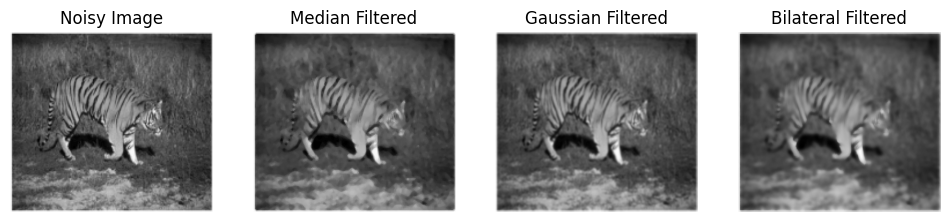

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

# Upload file at runtime
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Read the image as grayscale
noisy_image = cv2.imdecode(np.frombuffer(uploaded[image_path], np.uint8), cv2.IMREAD_GRAYSCALE)

# Apply Median Filtering (Good for salt-and-pepper noise)
median_filtered = cv2.medianBlur(noisy_image, 5)

# Apply Gaussian Filtering (Smoothens Gaussian noise)
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Apply Bilateral Filtering (Preserves edges)
bilateral_filtered = cv2.bilateralFilter(noisy_image, 9, 75, 75)

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filtered")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title("Bilateral Filtered")
plt.axis('off')

plt.show()


5.

Saving tiger.png to tiger (4).png


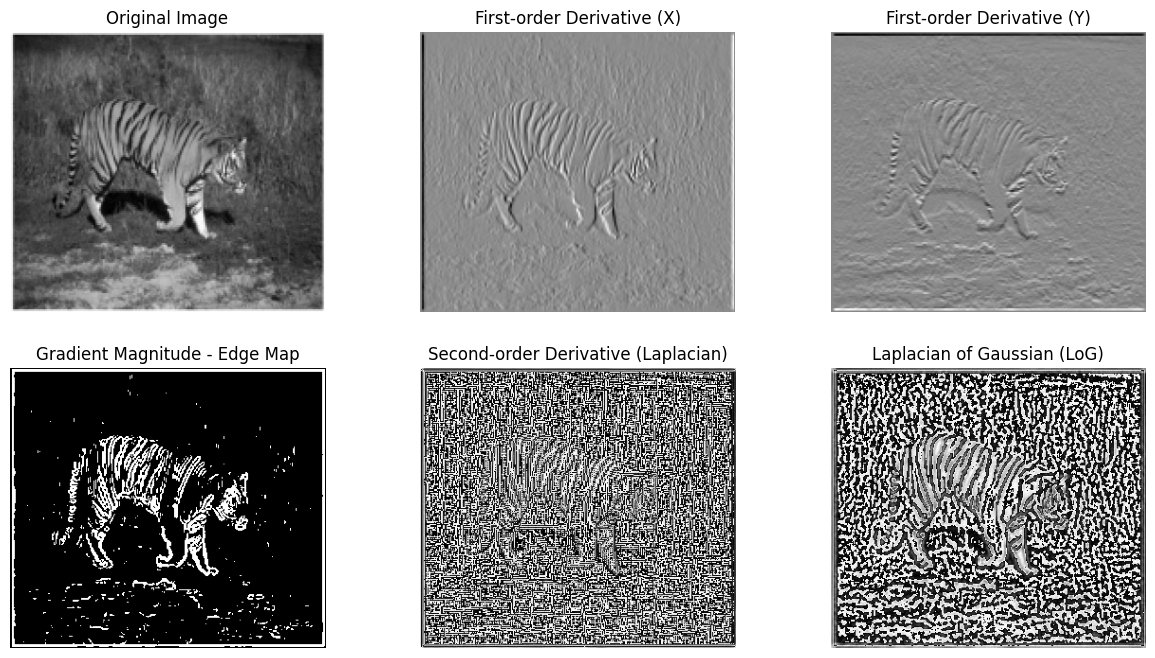

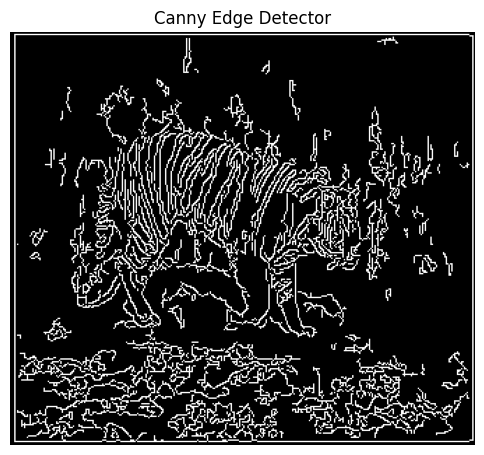

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload file at runtime
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file name

# Read the image as grayscale
original_image = cv2.imdecode(np.frombuffer(uploaded[image_path], np.uint8), cv2.IMREAD_GRAYSCALE)

# Compute first-order derivatives (Sobel)
sobel_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0, ksize=3)  # Derivative along x-axis
sobel_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1, ksize=3)  # Derivative along y-axis

# Compute Gradient Magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_magnitude = np.uint8(255 * gradient_magnitude / np.max(gradient_magnitude))  # Normalize

# Threshold the gradient to obtain the edge map
_, edge_map = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)

# Compute second-order derivative (Laplacian)
laplacian = cv2.Laplacian(original_image, cv2.CV_64F, ksize=3)
laplacian = np.uint8(255 * laplacian / np.max(laplacian))  # Normalize

# Apply Laplacian of Gaussian (LoG)
log_image = cv2.GaussianBlur(original_image, (5,5), 0)
log_image = cv2.Laplacian(log_image, cv2.CV_64F, ksize=3)
log_image = np.uint8(255 * log_image / np.max(log_image))  # Normalize

# Apply Canny Edge Detector
canny_edges = cv2.Canny(original_image, 50, 150)

# Display all images
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title("First-order Derivative (X)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title("First-order Derivative (Y)")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(edge_map, cmap='gray')
plt.title("Gradient Magnitude - Edge Map")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(laplacian, cmap='gray')
plt.title("Second-order Derivative (Laplacian)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(log_image, cmap='gray')
plt.title("Laplacian of Gaussian (LoG)")
plt.axis('off')

plt.figure(figsize=(6, 6))
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detector")
plt.axis('off')

plt.show()
